# Pulse Shape Discrimination

In [1]:
#importing the necessary libraries and toolkits

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
#reading the data (traindats.csv)

data=pd.read_csv("traindats.csv")

In [3]:
data.head()

,PulseNo,TotalArea,TailArea,Classification
0,1,7616,4568,Neutron
1,2,7616,4584,Neutron
2,3,7616,4860,Neutron
3,4,7616,4548,Neutron
4,5,7616,4344,Neutron


In [4]:
data.shape

(58121, 4)

In [5]:
#constructing input and target labels

x=data[['TotalArea','TailArea']]
y=data[['Classification']]
print(x)


       TotalArea  TailArea
0           7616      4568
1           7616      4584
2           7616      4860
3           7616      4548
4           7616      4344
...          ...       ...
58116       4524      1054
58117       4814      4122
58118       8474      8060
58119       3872      3854
58120       8748      6710

[58121 rows x 2 columns]


In [6]:
print(y)

      Classification
0            Neutron
1            Neutron
2            Neutron
3            Neutron
4            Neutron
...              ...
58116          Gamma
58117        Neutron
58118        Neutron
58119        Neutron
58120        Neutron

[58121 rows x 1 columns]


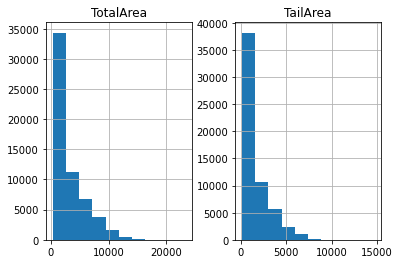

In [7]:
# histogram plots

x.hist()
plt.show()

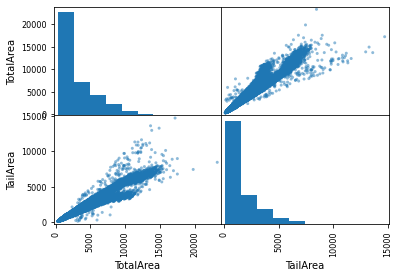

In [8]:
#scatter plots

scatter_matrix(x)
plt.show()

In [9]:
# train test split (80/20 %)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [10]:
len(x_train)


46496

In [11]:
len(x_test)

11625

In [12]:
# model- Logistic Regression

model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\91629\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [13]:
y_predict=model.predict(x_test)

In [14]:
accuracy_score(y_test,y_predict)

0.9999139784946236

In [15]:
# contracting the two coloumns 'Total area' & 'Tail area' into a single coloumn 'Total area/Tail area'

X=x.to_numpy()
X_new=(X[:,0]/X[:,1]).tolist()
print(X_new)

[1.6672504378283712, 1.6614310645724257, 1.5670781893004115, 1.6745822339489886, 1.7532228360957642, 2.125, 1.7356426618049225, 2.572972972972973, 2.2062572421784474, 2.148984198645598, 2.2666666666666666, 1.7467889908256882, 1.732484076433121, 2.6816901408450704, 1.8557504873294346, 1.6357388316151202, 2.277511961722488, 2.1202672605790647, 1.5866666666666667, 1.8237547892720307, 1.67311072056239, 2.2347417840375585, 2.2884615384615383, 1.63013698630137, 1.676056338028169, 2.381188118811881, 2.176470588235294, 2.381188118811881, 2.1004366812227073, 1.963265306122449, 2.1521252796420582, 1.5221518987341771, 1.6529209621993126, 2.1142857142857143, 1.5566343042071198, 2.0643776824034337, 2.357843137254902, 2.2268518518518516, 2.586021505376344, 2.3125, 2.0732758620689653, 2.1963470319634704, 1.7914338919925512, 1.687719298245614, 2.242424242424242, 2.046808510638298, 2.340632603406326, 2.1863636363636365, 2.0822510822510822, 1.5269841269841269, 1.6586206896551725, 1.5718954248366013, 2.2

In [16]:
data['TotalArea/TailArea']=X_new
data.head()

,PulseNo,TotalArea,TailArea,Classification,TotalArea/TailArea
0,1,7616,4568,Neutron,1.667250
1,2,7616,4584,Neutron,1.661431
2,3,7616,4860,Neutron,1.567078
3,4,7616,4548,Neutron,1.674582
4,5,7616,4344,Neutron,1.753223


In [17]:
Z=data[['PulseNo','TotalArea/TailArea']]
Z.head()

,PulseNo,TotalArea/TailArea
0,1,1.667250
1,2,1.661431
2,3,1.567078
3,4,1.674582
4,5,1.753223


In [18]:
# model- Gaussian Mixture Model fitting two components

from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=2,covariance_type='full',max_iter=1000,init_params='random',random_state=3).fit(Z)
ycluster=gmm.predict(Z)

In [19]:
ycluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
colours=['royalblue','red','deeppink','tan','olive','navy']
vectorizer=np.vectorize(lambda x: colours[x%len(colours)])

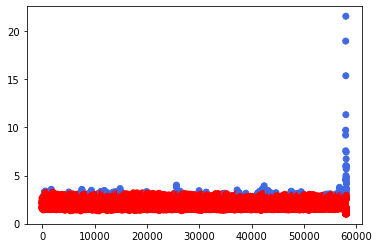

In [21]:
# scatter plot to depict the two Gaussian components that seperates the mixture

Z=Z.to_numpy()
plt.scatter(Z[:,0],Z[:,1],c=vectorizer(ycluster))

In [22]:
# Contingency matrix to report the intersection cardinality for every true/predicted cluster pair. 

from sklearn import metrics
def purity_score(y_true,y_pred):
    contingency_matrix=metrics.cluster.contingency_matrix(y_true,y_pred)
    return np.sum(np.amax(contingency_matrix,axis=0))/np.sum(contingency_matrix)

In [23]:
purity_score(y,ycluster)

0.7434662170299892

In [24]:
# model- Support Vector Machines

from sklearn.svm import SVC
model = SVC()

In [25]:
model.fit(x_train,y_train)

C:\Users\91629\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [26]:
model.score(x_test,y_test)

0.9710967741935483